# Final Project 

## Team members: Evelyn Yoon & Sangwon Lee

In [2]:
import io
from zipfile import ZipFile
import csv
import requests
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium

In [3]:
#import the data in csv. file
df = pd.read_csv(r'/Users/andrewlee/Downloads/Analytic Programming/Final Project/h1b.csv')
df.head()

Unnamed: 0          CASE_STATUS  \
0           1  CERTIFIED-WITHDRAWN   
1           2  CERTIFIED-WITHDRAWN   
2           3  CERTIFIED-WITHDRAWN   
3           4  CERTIFIED-WITHDRAWN   
4           5            WITHDRAWN   

                                       EMPLOYER_NAME  \
0                             UNIVERSITY OF MICHIGAN   
1                             GOODMAN NETWORKS, INC.   
2                          PORTS AMERICA GROUP, INC.   
3  GATES CORPORATION, A WHOLLY-OWNED SUBSIDIARY O...   
4                          PEABODY INVESTMENTS CORP.   

                        SOC_NAME                     JOB_TITLE  \
0  BIOCHEMISTS AND BIOPHYSICISTS  POSTDOCTORAL RESEARCH FELLOW   
1               CHIEF EXECUTIVES       CHIEF OPERATING OFFICER   
2               CHIEF EXECUTIVES         CHIEF PROCESS OFFICER   
3               CHIEF EXECUTIVES   REGIONAL PRESIDEN, AMERICAS   
4               CHIEF EXECUTIVES  PRESIDENT MONGOLIA AND INDIA   

  FULL_TIME_POSITION  PREVAILING_WAGE    YEAR                 WORKSITE  \
0                  N          36067.0  2016.0      ANN ARBOR, MICHIGAN   
1                  Y         242674.0  2016.0             PLANO, TEXAS   
2                  Y         193066.0  2016.0  JERSEY CITY, NEW JERSEY   
3                  Y         220314.0  2016.0         DENVER, COLORADO   
4                  Y         157518.4  2016.0      ST. LOUIS, MISSOURI   

          lon        lat  
0  -83.743038  42.280826  
1  -96.698886  33.019843  
2  -74.077642  40.728158  
3 -104.990251  39.739236  
4  -90.199404  38.627003

In [4]:
#drop the columns that we will not use
df_clean = df.drop(columns=['Unnamed: 0','lon','lat','FULL_TIME_POSITION','SOC_NAME'])
df_clean.head()

CASE_STATUS                                      EMPLOYER_NAME  \
0  CERTIFIED-WITHDRAWN                             UNIVERSITY OF MICHIGAN   
1  CERTIFIED-WITHDRAWN                             GOODMAN NETWORKS, INC.   
2  CERTIFIED-WITHDRAWN                          PORTS AMERICA GROUP, INC.   
3  CERTIFIED-WITHDRAWN  GATES CORPORATION, A WHOLLY-OWNED SUBSIDIARY O...   
4            WITHDRAWN                          PEABODY INVESTMENTS CORP.   

                      JOB_TITLE  PREVAILING_WAGE    YEAR  \
0  POSTDOCTORAL RESEARCH FELLOW          36067.0  2016.0   
1       CHIEF OPERATING OFFICER         242674.0  2016.0   
2         CHIEF PROCESS OFFICER         193066.0  2016.0   
3   REGIONAL PRESIDEN, AMERICAS         220314.0  2016.0   
4  PRESIDENT MONGOLIA AND INDIA         157518.4  2016.0   

                  WORKSITE  
0      ANN ARBOR, MICHIGAN  
1             PLANO, TEXAS  
2  JERSEY CITY, NEW JERSEY  
3         DENVER, COLORADO  
4      ST. LOUIS, MISSOURI

In [5]:
# The direct link to the Kaggle data set
data_url = 'https://www.kaggle.com/jonamjar/h1b-data-set-2017/data#H-1B_Disclosure_Data_FY17.csv'

# The local path where the data set is saved.
local_filename = "H-1B_Disclosure_Data_FY17.csv"

# Kaggle Username and Password
kaggle_info = {'UserName': "byoon111", 'Password': "save1234"}

# Download the CSV file.
r = requests.get(data_url)

# Login to Kaggle and retrieve the data.
r = requests.post(r.url, data = kaggle_info)

# Writes the data to a local file one chunk at a time.
f = open(local_filename, 'wb')
for chunk in r.iter_content(chunk_size = 512 * 1024): # Reads 512KB at a time into memory
    if chunk: # filter out keep-alive new chunks
        f.write(chunk)
f.close()

In [6]:
# read the csv file downloaded via API
df1 = pd.read_csv(r'/Users/H-1B_Disclosure_Data_FY17.csv')
df1.head()

/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (15,16,17,25) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Unnamed: 0         CASE_NUMBER          CASE_STATUS CASE_SUBMITTED  \
0           0  I-200-16055-173457  CERTIFIED-WITHDRAWN        2/24/16   
1           1  I-200-16064-557834  CERTIFIED-WITHDRAWN         3/4/16   
2           2  I-200-16063-996093  CERTIFIED-WITHDRAWN        3/10/16   
3           3  I-200-16272-196340            WITHDRAWN        9/28/16   
4           4  I-200-15053-636744  CERTIFIED-WITHDRAWN        2/22/15   

  DECISION_DATE VISA_CLASS EMPLOYMENT_START_DATE EMPLOYMENT_END_DATE  \
0       10/1/16       H-1B               8/10/16             8/10/19   
1       10/1/16       H-1B               8/16/16             8/16/19   
2       10/1/16       H-1B                9/9/16              9/9/19   
3       10/1/16       H-1B               1/26/17             1/25/20   
4       10/2/16       H-1B                3/1/15              3/1/18   

               EMPLOYER_NAME EMPLOYER_BUSINESS_DBA        ...          \
0     DISCOVER PRODUCTS INC.                   NaN        ...           
1           DFS SERVICES LLC                   NaN        ...           
2  EASTBANC TECHNOLOGIES LLC                   NaN        ...           
3          INFO SERVICES LLC                   NaN        ...           
4           BB&T CORPORATION                   NaN        ...           

  H1B_DEPENDENT WILLFUL_VIOLATOR SUPPORT_H1B LABOR_CON_AGREE  \
0             N                N         NaN               Y   
1             N                N         NaN               Y   
2             Y                N           Y             NaN   
3             Y                N           Y             NaN   
4             N                N         NaN               Y   

  PUBLIC_DISCLOSURE_LOCATION WORKSITE_CITY WORKSITE_COUNTY WORKSITE_STATE  \
0                        NaN    RIVERWOODS            LAKE             IL   
1                        NaN    RIVERWOODS            LAKE             IL   
2                        NaN    WASHINGTON             NaN             DC   
3                        NaN   JERSEY CITY          HUDSON             NJ   
4                        NaN      NEW YORK        NEW YORK             NY   

  WORKSITE_POSTAL_CODE ORIGINAL_CERT_DATE  
0                60015             3/1/16  
1                60015             3/8/16  
2                20007            3/16/16  
3                 7302                NaN  
4                10036            2/26/15  

[5 rows x 53 columns]

In [7]:
#drop the columns that we will not use
df1_clean = df1.drop(columns=['CASE_NUMBER','CASE_SUBMITTED','DECISION_DATE','VISA_CLASS','EMPLOYMENT_START_DATE',
                              'EMPLOYMENT_END_DATE','SUPPORT_H1B','EMPLOYER_BUSINESS_DBA','H1B_DEPENDENT',
                              'WILLFUL_VIOLATOR','LABOR_CON_AGREE',
                              'PUBLIC_DISCLOSURE_LOCATION','WORKSITE_COUNTY',
                              'WORKSITE_POSTAL_CODE','ORIGINAL_CERT_DATE','EMPLOYER_ADDRESS',
                             'EMPLOYER_POSTAL_CODE','EMPLOYER_COUNTRY','EMPLOYER_PROVINCE',
                             'EMPLOYER_PHONE','EMPLOYER_PHONE_EXT','PW_UNIT_OF_PAY','PW_WAGE_LEVEL',
                             'PW_SOURCE','PW_SOURCE_YEAR','PW_SOURCE_OTHER','WAGE_RATE_OF_PAY_TO',
                             'WAGE_UNIT_OF_PAY','AGENT_REPRESENTING_EMPLOYER','AGENT_ATTORNEY_NAME',
                             'AGENT_ATTORNEY_CITY','AGENT_ATTORNEY_STATE','CONTINUED_EMPLOYMENT',
                             'CHANGE_PREVIOUS_EMPLOYMENT','NEW_CONCURRENT_EMPLOYMENT','CHANGE_EMPLOYER',
                             'AMENDED_PETITION','FULL_TIME_POSITION','WAGE_RATE_OF_PAY_FROM',
                             'Unnamed: 0','SOC_CODE','SOC_NAME','NAICS_CODE','TOTAL_WORKERS',
                             'NEW_EMPLOYMENT','EMPLOYER_STATE','EMPLOYER_CITY','WORKSITE_STATE'])

In [8]:
df1_clean.head()

CASE_STATUS              EMPLOYER_NAME  \
0  CERTIFIED-WITHDRAWN     DISCOVER PRODUCTS INC.   
1  CERTIFIED-WITHDRAWN           DFS SERVICES LLC   
2  CERTIFIED-WITHDRAWN  EASTBANC TECHNOLOGIES LLC   
3            WITHDRAWN          INFO SERVICES LLC   
4  CERTIFIED-WITHDRAWN           BB&T CORPORATION   

                                      JOB_TITLE  PREVAILING_WAGE WORKSITE_CITY  
0                    ASSOCIATE DATA INTEGRATION          59197.0    RIVERWOODS  
1                              SENIOR ASSOCIATE          49800.0    RIVERWOODS  
2                      .NET SOFTWARE PROGRAMMER          76502.0    WASHINGTON  
3                               PROJECT MANAGER          90376.0   JERSEY CITY  
4  ASSOCIATE - ESOTERIC ASSET BACKED SECURITIES         116605.0      NEW YORK

In [9]:
# add the year of 2017
df1_clean['YEAR']='2017'
df1_clean.head()

CASE_STATUS              EMPLOYER_NAME  \
0  CERTIFIED-WITHDRAWN     DISCOVER PRODUCTS INC.   
1  CERTIFIED-WITHDRAWN           DFS SERVICES LLC   
2  CERTIFIED-WITHDRAWN  EASTBANC TECHNOLOGIES LLC   
3            WITHDRAWN          INFO SERVICES LLC   
4  CERTIFIED-WITHDRAWN           BB&T CORPORATION   

                                      JOB_TITLE  PREVAILING_WAGE  \
0                    ASSOCIATE DATA INTEGRATION          59197.0   
1                              SENIOR ASSOCIATE          49800.0   
2                      .NET SOFTWARE PROGRAMMER          76502.0   
3                               PROJECT MANAGER          90376.0   
4  ASSOCIATE - ESOTERIC ASSET BACKED SECURITIES         116605.0   

  WORKSITE_CITY  YEAR  
0    RIVERWOODS  2017  
1    RIVERWOODS  2017  
2    WASHINGTON  2017  
3   JERSEY CITY  2017  
4      NEW YORK  2017

In [10]:
# change a format of worksite (data transformation operation)
regex = r'(?P<City>[^,]+)'
df_clean['WORKSITE'] = df_clean['WORKSITE'].str.extract(regex)
df_clean.head()

CASE_STATUS                                      EMPLOYER_NAME  \
0  CERTIFIED-WITHDRAWN                             UNIVERSITY OF MICHIGAN   
1  CERTIFIED-WITHDRAWN                             GOODMAN NETWORKS, INC.   
2  CERTIFIED-WITHDRAWN                          PORTS AMERICA GROUP, INC.   
3  CERTIFIED-WITHDRAWN  GATES CORPORATION, A WHOLLY-OWNED SUBSIDIARY O...   
4            WITHDRAWN                          PEABODY INVESTMENTS CORP.   

                      JOB_TITLE  PREVAILING_WAGE    YEAR     WORKSITE  
0  POSTDOCTORAL RESEARCH FELLOW          36067.0  2016.0    ANN ARBOR  
1       CHIEF OPERATING OFFICER         242674.0  2016.0        PLANO  
2         CHIEF PROCESS OFFICER         193066.0  2016.0  JERSEY CITY  
3   REGIONAL PRESIDEN, AMERICAS         220314.0  2016.0       DENVER  
4  PRESIDENT MONGOLIA AND INDIA         157518.4  2016.0    ST. LOUIS

In [11]:
# change the name of the column from WORKSITE_CITY to WORKSITE
df1_clean = df1_clean.rename(index = str, columns = {"WORKSITE_CITY": "WORKSITE"})
df1_clean

CASE_STATUS                          EMPLOYER_NAME  \
0       CERTIFIED-WITHDRAWN                 DISCOVER PRODUCTS INC.   
1       CERTIFIED-WITHDRAWN                       DFS SERVICES LLC   
2       CERTIFIED-WITHDRAWN              EASTBANC TECHNOLOGIES LLC   
3                 WITHDRAWN                      INFO SERVICES LLC   
4       CERTIFIED-WITHDRAWN                       BB&T CORPORATION   
5       CERTIFIED-WITHDRAWN                   SUNTRUST BANKS, INC.   
6       CERTIFIED-WITHDRAWN      CITADEL INFORMATION SERVICES INC.   
7       CERTIFIED-WITHDRAWN      CITADEL INFORMATION SERVICES INC.   
8       CERTIFIED-WITHDRAWN      CITADEL INFORMATION SERVICES INC.   
9       CERTIFIED-WITHDRAWN      CITADEL INFORMATION SERVICES INC.   
10      CERTIFIED-WITHDRAWN      CITADEL INFORMATION SERVICES INC.   
11      CERTIFIED-WITHDRAWN      ADVANCED TECHNOLOGY GROUP USA INC   
12      CERTIFIED-WITHDRAWN      ADVANCED TECHNOLOGY GROUP USA INC   
13      CERTIFIED-WITHDRAWN      ADVANCED TECHNOLOGY GROUP USA INC   
14      CERTIFIED-WITHDRAWN      ADVANCED TECHNOLOGY GROUP USA INC   
15      CERTIFIED-WITHDRAWN      ADVANCED TECHNOLOGY GROUP USA INC   
16                WITHDRAWN                               ITAS INC   
17      CERTIFIED-WITHDRAWN                               BATTELLE   
18      CERTIFIED-WITHDRAWN   HARMONY SCIENCE ACADEMY-HOUSTON HIGH   
19      CERTIFIED-WITHDRAWN           HARMONY SCIENCE ACADEMY-WACO   
20      CERTIFIED-WITHDRAWN                 IDC TECHNOLOGIES, INC.   
21      CERTIFIED-WITHDRAWN                               BATTELLE   
22      CERTIFIED-WITHDRAWN     OREGON HEALTH & SCIENCE UNIVERSITY   
23      CERTIFIED-WITHDRAWN                             GIMMAL LLC   
24      CERTIFIED-WITHDRAWN         HARMONY SCIENCE ACADEMY-EULESS   
25      CERTIFIED-WITHDRAWN                      PLANTRONICS, INC.   
26      CERTIFIED-WITHDRAWN              THE UNIVERSITY OF CHICAGO   
27      CERTIFIED-WITHDRAWN  UNIVERSITY OF CALIFORNIA, LOS ANGELES   
28      CERTIFIED-WITHDRAWN        AXCESS FINANCIAL SERVICES, INC.   
29      CERTIFIED-WITHDRAWN            WASHINGTON STATE UNIVERSITY   
...                     ...                                    ...   
624620               DENIED         ELLIOTT MANAGEMENT CORPORATION   
624621            WITHDRAWN        I NET SOFTWARE TECHNOLOGIES INC   
624622            WITHDRAWN                 NTT DATA SERVICES, LLC   
624623            WITHDRAWN             FRONTIER TECHNOLOGIES, LLC   
624624            WITHDRAWN        AVANI TECHNOLOGY SOLUTIONS INC.   
624625            WITHDRAWN                 NTT DATA SERVICES, LLC   
624626            WITHDRAWN              PHILIPS NORTH AMERICA LLC   
624627            WITHDRAWN                           AMPCUS, INC.   
624628            WITHDRAWN              VIGILANT TECHNOLOGIES LLC   
624629            WITHDRAWN                            ZUORA, INC.   
624630            WITHDRAWN     WASHINGTON UNIVERSITY IN ST. LOUIS   
624631            WITHDRAWN               ARTEMIS CONSULTING, INC.   
624632            WITHDRAWN                   BANK OF AMERICA N.A.   
624633            WITHDRAWN      HALLIBURTON ENERGY SERVICES, INC.   
624634            WITHDRAWN           ADVANCED MICRO DEVICES, INC.   
624635            WITHDRAWN                       CONSUMERINFO.COM   
624636            WITHDRAWN     MICHAEL MALTZAN ARCHITECTURE, INC.   
624637            WITHDRAWN        L&T TECHNOLOGY SERVICES LIMITED   
624638            WITHDRAWN                      HCL AMERICA, INC.   
624639            WITHDRAWN                   TECHNOSOFT GROUP INC   
624640            WITHDRAWN             FRONTIER TECHNOLOGIES, LLC   
624641            WITHDRAWN                     CASA SYSTEMS, INC.   
624642  CERTIFIED-WITHDRAWN               STLPORT CONSULTING, INC.   
624643  CERTIFIED-WITHDRAWN               STLPORT CONSULTING, INC.   
624644  CERTIFIED-WITHDRAWN               STLPORT CONSULTING, INC.   
624645  CERTIFIED-WITHDRAW

In [12]:
# get these two dataframes with the selected columns
column_list = ["CASE_STATUS", "EMPLOYER_NAME", "JOB_TITLE", "PREVAILING_WAGE", "WORKSITE", "YEAR"]
result = pd.DataFrame(data=df_clean, columns=column_list)
result1 = pd.DataFrame(data=df1_clean, columns=column_list)

In [13]:
result.head()

CASE_STATUS                                      EMPLOYER_NAME  \
0  CERTIFIED-WITHDRAWN                             UNIVERSITY OF MICHIGAN   
1  CERTIFIED-WITHDRAWN                             GOODMAN NETWORKS, INC.   
2  CERTIFIED-WITHDRAWN                          PORTS AMERICA GROUP, INC.   
3  CERTIFIED-WITHDRAWN  GATES CORPORATION, A WHOLLY-OWNED SUBSIDIARY O...   
4            WITHDRAWN                          PEABODY INVESTMENTS CORP.   

                      JOB_TITLE  PREVAILING_WAGE     WORKSITE    YEAR  
0  POSTDOCTORAL RESEARCH FELLOW          36067.0    ANN ARBOR  2016.0  
1       CHIEF OPERATING OFFICER         242674.0        PLANO  2016.0  
2         CHIEF PROCESS OFFICER         193066.0  JERSEY CITY  2016.0  
3   REGIONAL PRESIDEN, AMERICAS         220314.0       DENVER  2016.0  
4  PRESIDENT MONGOLIA AND INDIA         157518.4    ST. LOUIS  2016.0

In [14]:
result1.head()

CASE_STATUS              EMPLOYER_NAME  \
0  CERTIFIED-WITHDRAWN     DISCOVER PRODUCTS INC.   
1  CERTIFIED-WITHDRAWN           DFS SERVICES LLC   
2  CERTIFIED-WITHDRAWN  EASTBANC TECHNOLOGIES LLC   
3            WITHDRAWN          INFO SERVICES LLC   
4  CERTIFIED-WITHDRAWN           BB&T CORPORATION   

                                      JOB_TITLE  PREVAILING_WAGE     WORKSITE  \
0                    ASSOCIATE DATA INTEGRATION          59197.0   RIVERWOODS   
1                              SENIOR ASSOCIATE          49800.0   RIVERWOODS   
2                      .NET SOFTWARE PROGRAMMER          76502.0   WASHINGTON   
3                               PROJECT MANAGER          90376.0  JERSEY CITY   
4  ASSOCIATE - ESOTERIC ASSET BACKED SECURITIES         116605.0     NEW YORK   

   YEAR  
0  2017  
1  2017  
2  2017  
3  2017  
4  2017

In [18]:
# appends the rows from the two Dataframes to create the final Dataframe
final = result.append(result1, ignore_index=True, sort=False)
final

CASE_STATUS  \
0        CERTIFIED-WITHDRAWN   
1        CERTIFIED-WITHDRAWN   
2        CERTIFIED-WITHDRAWN   
3        CERTIFIED-WITHDRAWN   
4                  WITHDRAWN   
5        CERTIFIED-WITHDRAWN   
6        CERTIFIED-WITHDRAWN   
7        CERTIFIED-WITHDRAWN   
8        CERTIFIED-WITHDRAWN   
9                  WITHDRAWN   
10       CERTIFIED-WITHDRAWN   
11       CERTIFIED-WITHDRAWN   
12       CERTIFIED-WITHDRAWN   
13       CERTIFIED-WITHDRAWN   
14       CERTIFIED-WITHDRAWN   
15       CERTIFIED-WITHDRAWN   
16       CERTIFIED-WITHDRAWN   
17       CERTIFIED-WITHDRAWN   
18                 CERTIFIED   
19                 CERTIFIED   
20       CERTIFIED-WITHDRAWN   
21       CERTIFIED-WITHDRAWN   
22                 CERTIFIED   
23                 CERTIFIED   
24       CERTIFIED-WITHDRAWN   
25                 CERTIFIED   
26       CERTIFIED-WITHDRAWN   
27                 CERTIFIED   
28                 CERTIFIED   
29                 CERTIFIED   
...                      ...   
3627078               DENIED   
3627079            WITHDRAWN   
3627080            WITHDRAWN   
3627081            WITHDRAWN   
3627082            WITHDRAWN   
3627083            WITHDRAWN   
3627084            WITHDRAWN   
3627085            WITHDRAWN   
3627086            WITHDRAWN   
3627087            WITHDRAWN   
3627088            WITHDRAWN   
3627089            WITHDRAWN   
3627090            WITHDRAWN   
3627091            WITHDRAWN   
3627092            WITHDRAWN   
3627093            WITHDRAWN   
3627094            WITHDRAWN   
3627095            WITHDRAWN   
3627096            WITHDRAWN   
3627097            WITHDRAWN   
3627098            WITHDRAWN   
3627099            WITHDRAWN   
3627100  CERTIFIED-WITHDRAWN   
3627101  CERTIFIED-WITHDRAWN   
3627102  CERTIFIED-WITHDRAWN   
3627103  CERTIFIED-WITHDRAWN   
3627104            CERTIFIED   
3627105            CERTIFIED   
3627106            CERTIFIED   
3627107            CERTIFIED   

                                             EMPLOYER_NAME  \
0                                   UNIVERSITY OF MICHIGAN   
1                                   GOODMAN NETWORKS, INC.   
2                                PORTS AMERICA GROUP, INC.   
3        GATES CORPORATION, A WHOLLY-OWNED SUBSIDIARY O...   
4                                PEABODY INVESTMENTS CORP.   
5                                  BURGER KING CORPORATION   
6                         BT AND MK ENERGY AND COMMODITIES   
7                          GLOBO MOBILE TECHNOLOGIES, INC.   
8                                       ESI COMPANIES INC.   
9                                LESSARD INTERNATIONAL LLC   
10                                      H.J. HEINZ COMPANY   
11                                 DOW CORNING CORPORATION   
12                                        ACUSHNET COMPANY   
13                                           BIOCAIR, INC.   
14                              NEWMONT MINING CORPORATION   
15                                            VRICON, INC.   
16                             CARDIAC SCIENCE CORPORATION   
17                                   WESTFIELD CORPORATION   
18                                          QUICKLOGIX LLC   
19                                   MCCHRYSTAL GROUP, LLC   
20                                       CUDDLE BARN, INC.   
21                                   WESTFIELD CORPORATION   
22                                             LOMICS, LLC   
23                UC UNIVERSITY HIGH SCHOOL EDUCATION INC.   
24                                  VMS COMMUNICATIONS LLC   
25                                        QUICKLOGIX, INC.   
26                              FOODESSENTIALS CORPORATION   
27                                              HELLO INC.   
28                                              UMBEL CORP   
29                 PERSPECTIVES OF FREEDOM FOUNDATION, INC   
...                                                    ...   
3627078                     ELLIOTT MANAGEMENT C

Now, we're ready for exploratory data analysis and answering our research questions!

# 1. How the trend of total petitions has been changed over recent years?

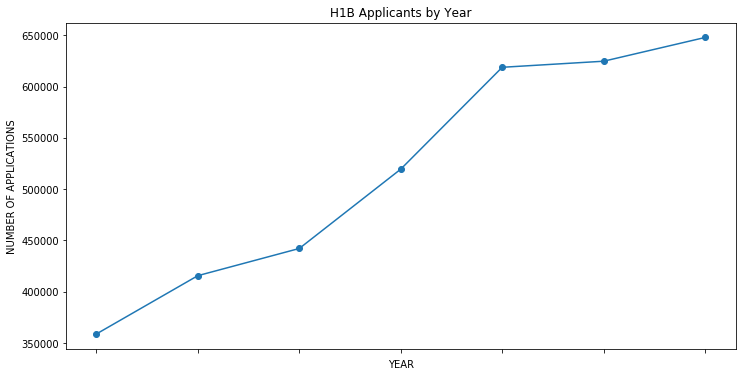

In [40]:
# Show the trend as a line graph
plt.figure(figsize=(12,6))
final['YEAR'].value_counts().sort_values().plot(marker='o')
plt.title('H1B Applicants by Year')
plt.xlabel('YEAR')
plt.ylabel('NUMBER OF APPLICATIONS')
plt.show()

Based on the above line graph, the number of H-1B applicants has been increasing since 2011. From 2013 to 2015, the H-1B applicants are dramatically increased. We can assume that this is because US economic is getting better after 2008-2010 financial crisis. If economic is getting worse, most companies will not support working visa for foreigners. 

# 2. What is the most popular job of those that applying the visa? Which employers file the most petitions over the year?

In [21]:
name_count = final.groupby('JOB_TITLE').size()
top_10_job = name_count.sort_values(ascending=False)[:10]
print(top_10_job)

JOB_TITLE
PROGRAMMER ANALYST          296189
SOFTWARE ENGINEER           149257
COMPUTER PROGRAMMER          77873
SYSTEMS ANALYST              72763
SOFTWARE DEVELOPER           59014
BUSINESS ANALYST             47091
COMPUTER SYSTEMS ANALYST     41641
SENIOR SOFTWARE ENGINEER     34116
TECHNOLOGY LEAD - US         31162
ASSISTANT PROFESSOR          30222
dtype: int64


As you see, IT related job is the popular job for alien people who need to be supported H1B visa. The most popular job is a promrammer analyst. 

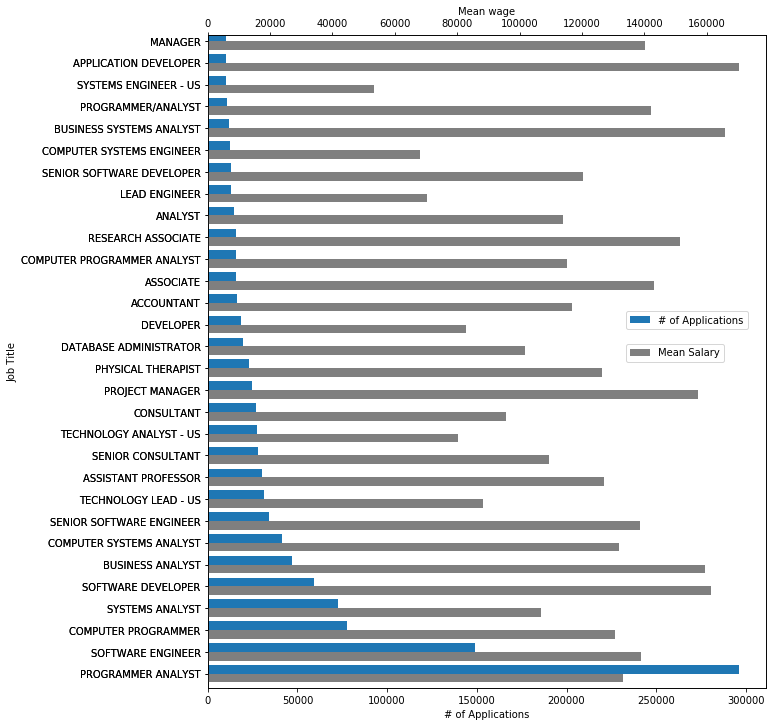

In [23]:
# compare two bar graph, which is the number of applications and wages
pjob = final[['JOB_TITLE', 'EMPLOYER_NAME', 'PREVAILING_WAGE']].groupby(['JOB_TITLE'])
tjob = list(pjob.count().sort_values(by='EMPLOYER_NAME', ascending=False).head(30).index)
dfa = pjob.count().loc[tjob].assign(mean_wage=pjob.mean().loc[tjob])
fig = plt.figure(figsize=(10,12))
ax1 = fig.add_subplot(111)
ax2 = ax1.twiny()
width = 0.35
dfa.EMPLOYER_NAME.plot(kind='barh', ax=ax1, color='C0', width=0.4, position=0, label='# of Applications')
dfa.mean_wage.plot(kind='barh', ax=ax2, color='C7', width=0.4, position=1, label='Mean Salary')
ax1.set_xlabel('# of Applications')
ax1.set_ylabel('')
ax1.legend(loc=(0.75,0.55))
ax2.set_xlabel('Mean wage')
ax2.set_ylabel('Job Title')
ax2.legend(loc=(0.75,0.50))
plt.show()

This graph indicates the mean salary amounts per each job. Also, this is supported that the programmer analyst is the most popular job. 

In [24]:
name_count = final.groupby('EMPLOYER_NAME').size()
top_10_EMPLOYER_NAME = name_count.sort_values(ascending=False)[:10]
print(top_10_EMPLOYER_NAME)

EMPLOYER_NAME
INFOSYS LIMITED                      151179
TATA CONSULTANCY SERVICES LIMITED     78255
WIPRO LIMITED                         53294
DELOITTE CONSULTING LLP               43921
IBM INDIA PRIVATE LIMITED             42953
ACCENTURE LLP                         40137
MICROSOFT CORPORATION                 30581
HCL AMERICA, INC.                     26941
CAPGEMINI AMERICA INC                 26329
ERNST & YOUNG U.S. LLP                24328
dtype: int64


By looks of this chart, INFOSYS LIMITED filed the most petitions over the years. 

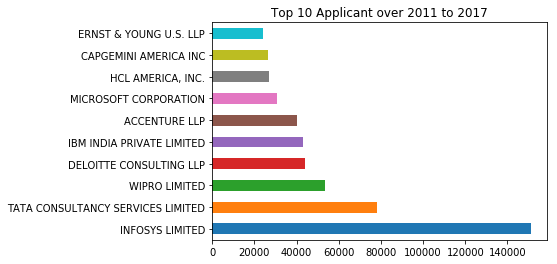

In [25]:
# create bar graph with different colors
emp = final['EMPLOYER_NAME'].groupby([final['EMPLOYER_NAME']]).count().sort_values(ascending=False).head(10).plot(kind='barh', title="Top 10 Applicant over 2011 to 2017")
emp.set_ylabel("")
plt.show()

By looks of this chart, INFOSYS LIMITED filed the most petitions over the years. 

# 3. Which job has the highest wage? 

In [26]:
high_job=final['JOB_TITLE'].value_counts().sort_values(ascending=False)[:20].to_frame()
final[final['JOB_TITLE'].isin(high_job.index)&(final['PREVAILING_WAGE']<=150000)].groupby(['JOB_TITLE'])['PREVAILING_WAGE'].mean().to_frame().sort_values(by='PREVAILING_WAGE')

PREVAILING_WAGE
JOB_TITLE                                   
ACCOUNTANT                      45586.815335
ASSISTANT PROFESSOR             57079.779599
PHYSICAL THERAPIST              57335.527687
TECHNOLOGY ANALYST - US         58680.898279
COMPUTER PROGRAMMER             59668.807514
PROGRAMMER ANALYST              59841.043940
BUSINESS ANALYST                60788.242171
COMPUTER PROGRAMMER ANALYST     61720.908593
DATABASE ADMINISTRATOR          62689.405212
SYSTEMS ANALYST                 62864.980530
COMPUTER SYSTEMS ANALYST        64338.700120
DEVELOPER                       65672.100708
CONSULTANT                      67428.717930
SOFTWARE DEVELOPER              70288.245133
TECHNOLOGY LEAD - US            73925.856741
SENIOR CONSULTANT               76671.416260
PROJECT MANAGER                 76911.412228
ASSOCIATE                       77617.518112
SOFTWARE ENGINEER               79516.307596
SENIOR SOFTWARE ENGINEER        95544.641786

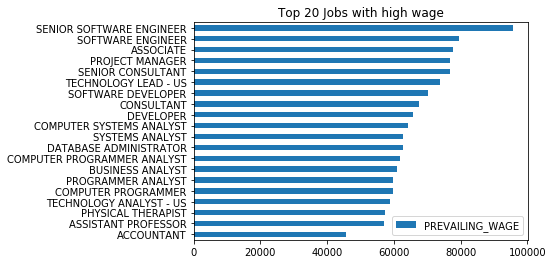

In [27]:
# sort out top 20 jobs based on the wage using bar graph
high_job=final['JOB_TITLE'].value_counts().sort_values(ascending=False)[:20].to_frame()
tt = final[final['JOB_TITLE'].isin(high_job.index)&(final['PREVAILING_WAGE']<=150000)].groupby(['JOB_TITLE'])['PREVAILING_WAGE'].mean().to_frame().sort_values(by='PREVAILING_WAGE').plot(kind='barh', title="Top 20 Jobs with high wage")
tt.set_ylabel("")
plt.show()

Based on this chart, we can say that software engineers are getting paid the highest wages. Majority of top 20 of high wages are IT related jobs, but there are few non IT jobs such as associate, project manager, and consultant. Interestingly, an accountant is getting paid much lesser than data analyst. 

# 4. In which cities were the foreigners able to find jobs?

In [28]:
work = final['WORKSITE'].value_counts() #sort out by worksite
place = work[(work.values>10000)]

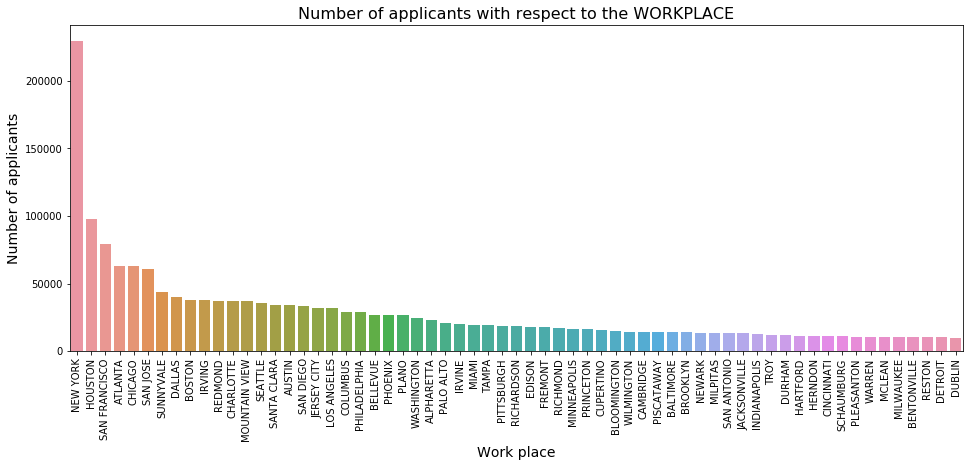

In [29]:
# Use plt bar graph
plt.figure(figsize=(16,6))
sns.barplot(place.index, place.values, alpha=1)
plt.xticks(rotation='vertical')
plt.xlabel('Work place', fontsize=14)
plt.ylabel('Number of applicants', fontsize=14)
plt.title("Number of applicants with respect to the WORKPLACE", fontsize=16)
plt.show()

We can say "thanks god!" since companies in New York State have been hired a lot of ailen people than other State. Based on the size of the city, the chances for foreingers are increased.

In [30]:
# install and import folium and grouped by 'lat' and 'lon' and 'worksite'
sal_state=df.groupby(['lat','lon','WORKSITE'])['PREVAILING_WAGE'].median().sort_values(ascending=False).reset_index()
appli=df.groupby(['lat','lon'])['Unnamed: 0'].count().reset_index()
locate=sal_state[['lat','lon']]
sal=sal_state['PREVAILING_WAGE']
state=sal_state['WORKSITE']
def color_producer(elevation):
    if elevation < 75000: # mark it red if the wages are lesser than 75000
        return 'red'
    elif 75000 <= elevation < 100000:
        return 'orange' # mark it orange between 75000 and 100000
    else:
        return 'green' # mark it green for others
map1 = folium.Map(location=[39.50, -98.35],tiles='CartoDB dark_matter',zoom_start=3.5)
for point in sal_state.index:
    folium.CircleMarker(list(locate.loc[point]),popup='<b>Average Salary in $: </b>'+str(sal.loc[point])+"<br><b> State: "+str(state.loc[point]),radius=sal.loc[point]*0.0001,color=color_producer(sal.loc[point]),fill_color=color_producer(sal.loc[point]),fill=True).add_to(map1)
map1
# refer codes in regards to visualizing the information as map

As you see this map, California has median data analysts.  

# 5. What’s the wage distribution for H1B applicants?

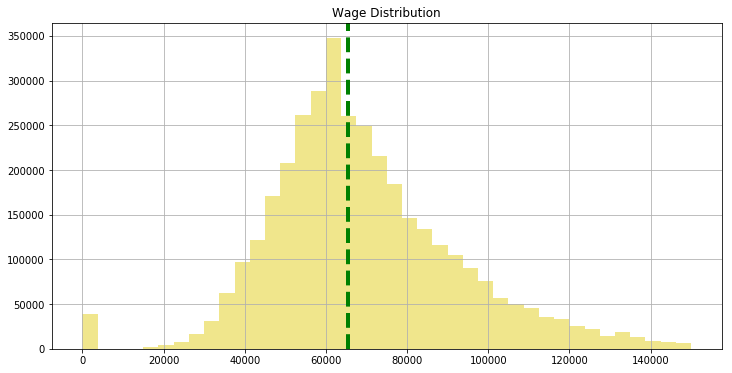

In [31]:
plt.figure(figsize=(12,6))
final[final['PREVAILING_WAGE']<150000].PREVAILING_WAGE.hist(bins=40,color='khaki')
plt.axvline(final[final['PREVAILING_WAGE']<=150000].PREVAILING_WAGE.median(), 
            color='green', linestyle='dashed', linewidth=4)
plt.title('Wage Distribution')
plt.show()

Since the distribution is skewed towards the right, there is more chance to bias the mean estimate. Therefore, we ended up using median wage, which gives a better estimate as compared to the mean wage. From the graph above, the median wage is little bit below the 70K and the wages for most of applicants are somewhere between 40K to 80K. 

# Conclusion 

From the analysis we've done, clearly IT jobs are the most popular ones. Since we are in Data Analytics Program and consider to take a career path in data science or related industry, we believe there are high chance to find IT jobs as H1B applicants. There are few non-IT jobs for the popular jobs but still they require high level of computer and analysis skills like "Business analyst" in a rank #6. 

Another interesting observation was that New York is the top city where foreigners with H1B can find jobs. It's not surprising but confirm the fact that there will be much higher chance for us to find jobs since both of us live in New York and looking for the jobs specifically in New York. 

We find hope from this project that we may be able to find the IT job we want in New York, and hope it helps to other classmates with H1B to find some hope as we did.